<a href="https://colab.research.google.com/github/RylieWeaver9/Machine-Learning/blob/main/Decision_Tree_Moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [21]:
# Initialize arrays
X = []
Y = []

# Run loop of accuracy vs size of dataset
for i in range(1,6):
  n_samples = 10**i

  # Make dataset
  X_moons, y_moons = make_moons(n_samples, noise=0.4, random_state=42)
  X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
  
  # Find and set to best hyperparameters
  params = {'max_leaf_nodes': list(range(2, 100)), 'max_depth': list(range(1, 7)), 'min_samples_split': [2, 3, 4]}
  grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)
  grid_search_cv.fit(X_train, y_train)
  grid_search_cv.best_estimator_
  print(grid_search_cv.best_estimator_)

  # Make prediction
  y_pred = grid_search_cv.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)

  # Append to array to plot
  X.append(i)
  Y.append(accuracy)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, random_state=42)
1.0
DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42)
0.9
DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)
0.855
DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)
0.8595
DecisionTreeClassifier(max_depth=6, max_leaf_nodes=33, random_state=42)
0.8574


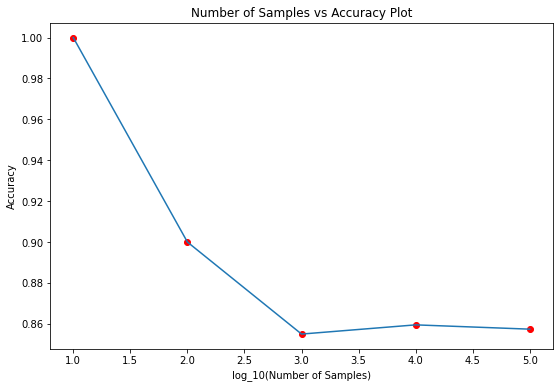

In [22]:
# Plot
plt.figure(figsize = (9,6))
# plt.ylim(0,1)
plt.scatter(X,Y, c='r')
plt.plot(X,Y)

# Label plot
plt.title('Number of Samples vs Accuracy Plot')
plt.xlabel('log_10(Number of Samples)')
plt.ylabel('Accuracy')

# Show
plt.show()

## The accuracy seems to decrease and plateau around 0.86 as the number of samples increases.